# Machine Learning in Time Series Forecasting	

# Overview of the Section

**1. Overview of the section**

**1 What we have done so far**

**2. Overview of Applied Machine Learning in Time Series Forecasting**

**3. Dataset Preparation**

**4. Univariate-time-series-forecasting**

    1. Autoregression (AR) in Time Series Forecasting
    2. Moving Average (MA) in Time Series Forecasting
    3. Autoregressive Moving Average (ARMA) in Time Series Forecasting
    4. Autoregressive integrated moving average (ARIMA) in Time Series Forecasting
    5. Auto ARIMA in Time Series Forecasting
    6. Seasonal Autoregressive Integrated Moving-Average (SARIMA) in Time Series Forecasting
    7. Auto - SARIMA in Time Series Forecasting    


# 1-Overview of this section


# What we have done So Far

# 2. Overview of Applied Machine Learning in Time Series Forecasting



**ML Methods For Time-Series Forecasting**


# 3. Preparaing Data to Apply Forecasting

# A- First things First
**Import Libraries**



In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# B- Overview of the Dataset


In [69]:
df = pd.read_csv('air_pollution.csv', parse_dates=['date'])

In [70]:
df.columns

Index(['date', 'pollution_today', 'dew'], dtype='object')

In [71]:
# df.drop(['dew', 'temp', 'temp',
#        'press', 'wnd_spd','pollution_yesterday','snow','rain'], axis=1, inplace=True)

In [72]:
df.drop('dew', axis=1, inplace=True)

In [73]:
df.set_index('date', inplace=True)

In [74]:
df

,pollution_today
date,
2010-01-02,145.958333
2010-01-03,78.833333
2010-01-04,31.333333
2010-01-05,42.458333
2010-01-06,56.416667
...,...
2014-12-27,238.666667
2014-12-28,197.375000
2014-12-29,159.000000


# C- Compute the Difference

In [75]:
df['pollution_today'].shift(1)

date
2010-01-02           NaN
2010-01-03    145.958333
2010-01-04     78.833333
2010-01-05     31.333333
2010-01-06     42.458333
                 ...    
2014-12-27    170.250000
2014-12-28    238.666667
2014-12-29    197.375000
2014-12-30    159.000000
2014-12-31     46.083333
Name: pollution_today, Length: 1825, dtype: float64

In [76]:
df['Pollution_today First Difference']= df['pollution_today']-df['pollution_today'].shift(1)

12 giorni per la differenza stagionale

In [77]:
df['Pollution_today Seasonal First Difference']= df['pollution_today']-df['pollution_today'].shift(12)

In [78]:
df.head(14)

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference
date,,,
2010-01-02,145.958333,NaN,NaN
2010-01-03,78.833333,-67.125000,NaN
2010-01-04,31.333333,-47.500000,NaN
2010-01-05,42.458333,11.125000,NaN
2010-01-06,56.416667,13.958333,NaN
2010-01-07,69.000000,12.583333,NaN
2010-01-08,176.208333,107.208333,NaN
2010-01-09,88.500000,-87.708333,NaN
2010-01-10,57.250000,-31.250000,NaN


# Revision of Stationary Check

In [79]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['pollution_today'])
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -10.116719
p value 0.000000
critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [80]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Pollution_today First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -13.925176
p value 0.000000
critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [81]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Pollution_today Seasonal First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -12.715198
p value 0.000000
critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# D- Autocorrelation Check

**Partial autocorrelation**:
il prezzo di oggi può dipendere da quello di 3 giorni fa ma non da quello di ieri

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [83]:
import statsmodels.api as sm

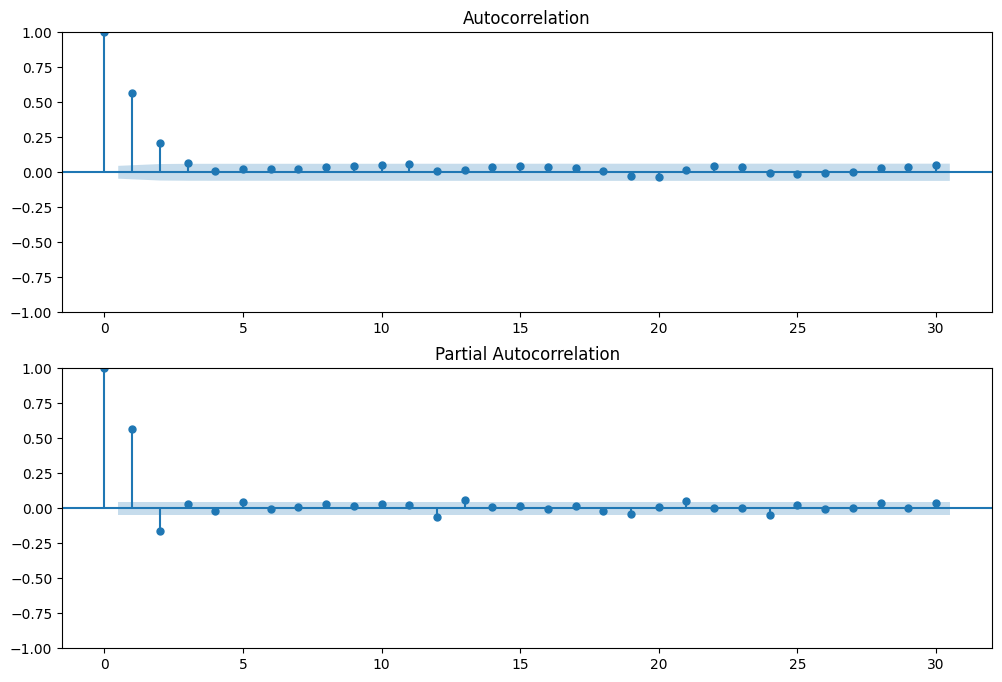

In [84]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df['pollution_today'], lags=30, ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['pollution_today'], lags=30, ax=ax2)

In [85]:
df['Pollution_today Seasonal First Difference']

date
2010-01-02           NaN
2010-01-03           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
                 ...    
2014-12-27    149.916667
2014-12-28    186.250000
2014-12-29     61.291667
2014-12-30   -123.166667
2014-12-31    -67.625000
Name: Pollution_today Seasonal First Difference, Length: 1825, dtype: float64

In [86]:
df['Pollution_today Seasonal First Difference'].iloc[13:]

date
2010-01-15    -33.375000
2010-01-16    146.291667
2010-01-17    166.750000
2010-01-18    203.791667
2010-01-19    271.750000
                 ...    
2014-12-27    149.916667
2014-12-28    186.250000
2014-12-29     61.291667
2014-12-30   -123.166667
2014-12-31    -67.625000
Name: Pollution_today Seasonal First Difference, Length: 1812, dtype: float64

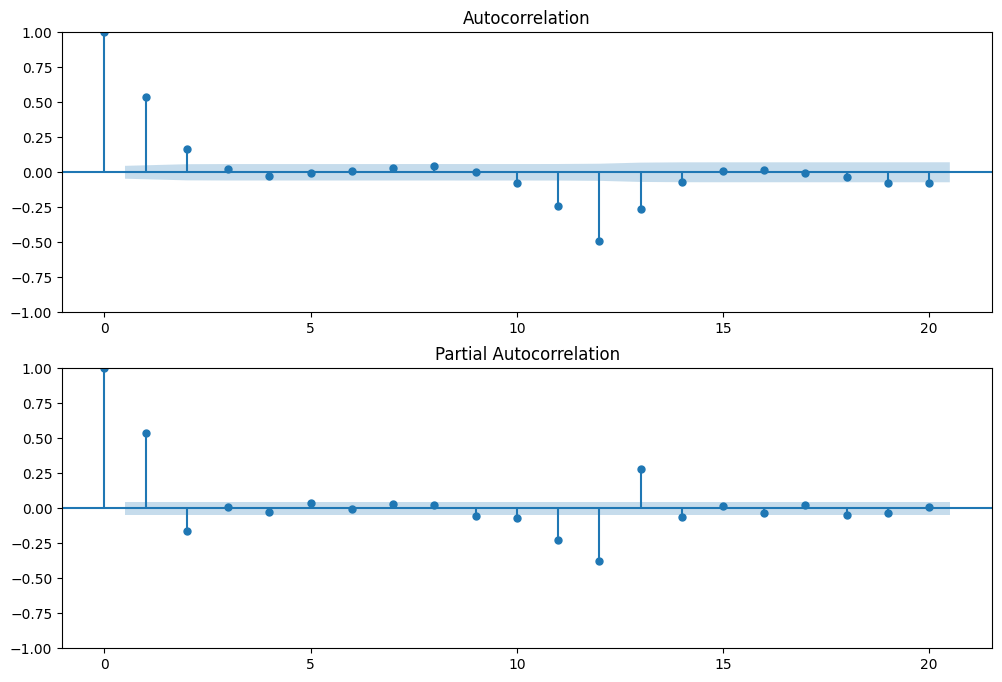

In [87]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df['Pollution_today Seasonal First Difference'].iloc[13:], lags=20, ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Pollution_today Seasonal First Difference'].iloc[13:], lags=20, ax=ax2)

# E- Auto-Correlation and Partial Correlation



# Data Splitting

**Prepare data before modeling**

In [88]:
len(df) * 70 /100

1277.5

In [89]:
resultsDict = {}
predictionsDict={}

split_date = '2013-10-01'

df_training = df.loc[df.index<=split_date]
df_test = df.loc[df.index>split_date]

print(f"{len(df_training)} days of training data\n {len(df_test)} days of testing data ")

1369 days of training data
 456 days of testing data 


# 4- Methods for time series forecasting



# A- Autoregression (AR)

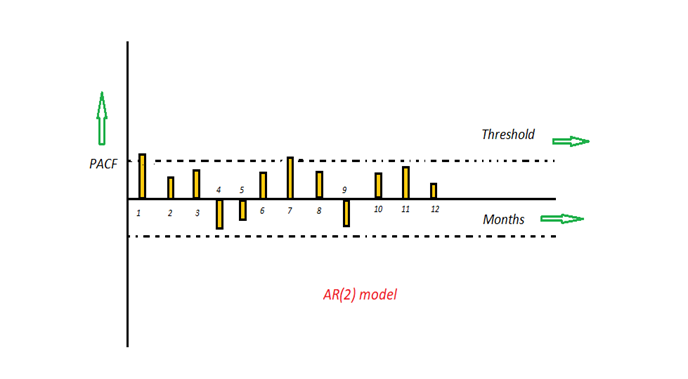

In [90]:
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm
from utils.metrics import evaluate

In [91]:
index = len(df_training)

y = list()


for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    
    model = AutoReg(temp_train.pollution_today, lags=50)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end= len(temp_train), dynamic=False)
    
    y = y +[predictions]
    
y = pd.concat(y)

resultsDict['AutoReg']= evaluate(df_test.pollution_today, y.values)
predictionsDict['AutoReg']= y.values

  0%|          | 0/456 [00:00<?, ?it/s]c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, Rang

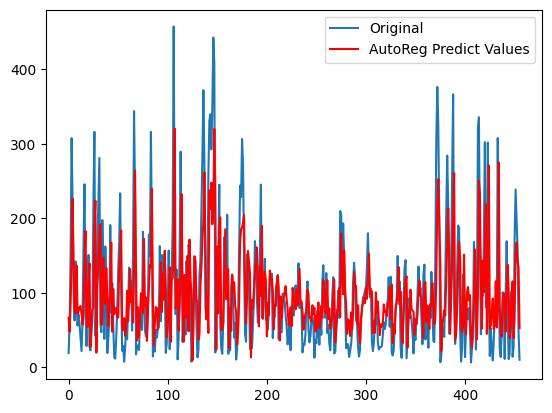

In [92]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(y.values, color='red', label='AutoReg Predict Values')
plt.legend()

In [93]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                 1824
Model:                    AutoReg(50)   Log Likelihood               -9818.637
Method:               Conditional MLE   S.D. of innovations             61.302
Date:                Mon, 24 Jun 2024   AIC                          19741.273
Time:                        10:50:06   BIC                          20026.285
Sample:                    02-21-2010   HQIC                         19846.559
                         - 12-30-2014                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  31.4374      6.925      4.540      0.000      17.865      45.009
pollution_today.L1      0.6749      0.024     28.449      0.000       0.628       0.721
pollution_today.L2     -0.1993      0.029     -6.966      0.000      -0.255      -0.143
pollution_today.L3      0.0594      0.029      2.047      0.041       0.003       0.116
pollution_today.L4     -0.0477      0.029     -1.643      0.100      -0.105       0.009
pollution_today.L5      0.0426      0.029      1.468      0.142      -0.014       0.100
pollution_today.L6     -0.0055      0.029     -0.189      0.850      -0.062       0.051
pollution_today.L7     -0.0131      0.029     -0.452      0.651      -0.070       0.044
pollution_today.L8      0.0187      0.029      0.644      0.520      -0.038       0.076
pollution_today.L9      0.0157      0.029      0.543      0.587      -0.041       0.072
pollution_today.L10    -0.0094      0.029     -0.325      0.745      -0.066       0.047
pollution_today.L11     0.0780      0.029      2.699      0.007       0.021       0.135
pollution_today.L12    -0.1064      0.029     -3.673      0.000      -0.163      -0.050
pollution_today.L13     0.0587      0.029      2.019      0.044       0.002       0.116
pollution_today.L14     0.0018      0.029      0.063      0.950      -0.055       0.059
pollution_today.L15     0.0154      0.029      0.531      0.596      -0.042       0.072
pollution_today.L16    -0.0115      0.029     -0.396      0.692      -0.069       0.045
pollution_today.L17     0.0160      0.029      0.552      0.581      -0.041       0.073
pollution_today.L18     0.0026      0.029      0.088      0.930      -0.054       0.060
pollution_today.L19    -0.0298      0.029     -1.025      0.305      -0.087       0.027
pollution_today.L20    -0.0380      0.029     -1.306      0.192      -0.095       0.019
pollution_today.L21     0.0603      0.029      2.071      0.038       0.003       0.117
pollution_today.L22    -0.0119      0.029     -0.408      0.683      -0.069       0.045
pollution_today.L23     0.0328      0.029      1.121      0.262      -0.025       0.090
pollution_today.L24    -0.0549      0.029     -1.874      0.061      -0.112       0.003
pollution_today.L25     0.0163      0.029      0.554      0.579      -0.041       0.074
pollution_today.L26     0.0024      0.029      0.083      0.934      -0.055       0.060
pollution_today.L27    -0.0184      0.029     -0.629      0.530      -0.076       0.039
pollution_today.L28     0.0409      0.029      1.397      0.162      -0.016       0.098
pollution_today.L29    -0.0184      0.029     -0.629      0.530      -0.076       0.039
pollution_today.L30     0.0259      0.029      0.887      0.375      -0.031       0.083
pollution_today.L31     0.0116      0.029      0.396      0.692      -0.046       0.069
pollution_today.L32    -0.0067      0.029     -0.227      0.820      -0.064       0.051
pollution_today.L33     0.0151      0.029      0.514      0.607      -0.0

# B-Moving average

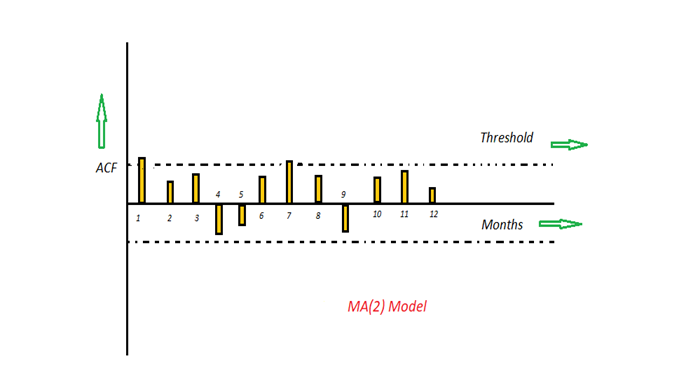

# C- ARMA





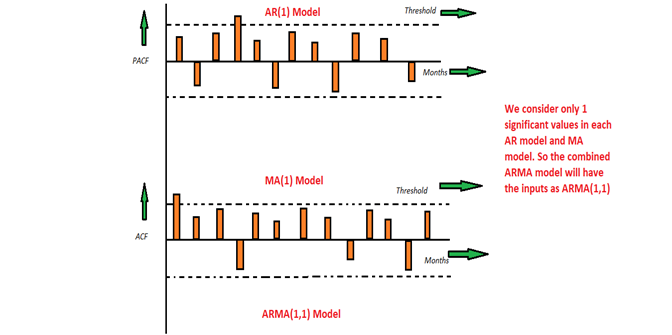




# D- Auto-Regressive Integrated Moving Average (ARIMA) Model



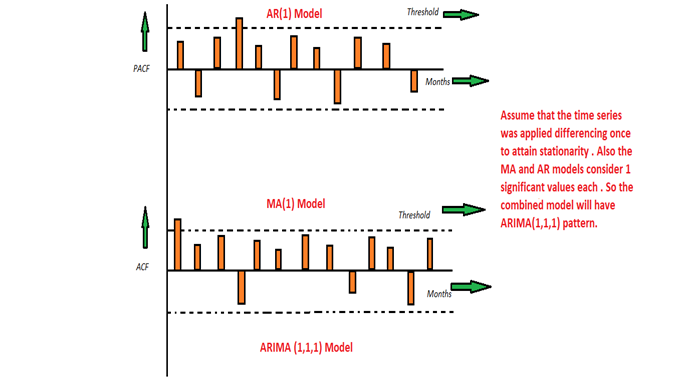


In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [95]:
model=ARIMA(df['pollution_today'], order=(1,1,1))
model_fit=model.fit()

c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [96]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10152.852
Date:                Mon, 24 Jun 2024   AIC                          20311.704
Time:                        10:50:06   BIC                          20328.230
Sample:                    01-02-2010   HQIC                         20317.800
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5699      0.012     46.465      0.000       0.546       0.594
ma.L1         -0.9999      0.038    -25.987      0.000      -1.075      -0.924
sigma2      3990.0212    187.430     21.288      0.000    3622.665    4357.378
===================================================================================
Ljung-Box (L1) (Q):                  15.95   Jarque-Bera (JB):               398.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.62
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

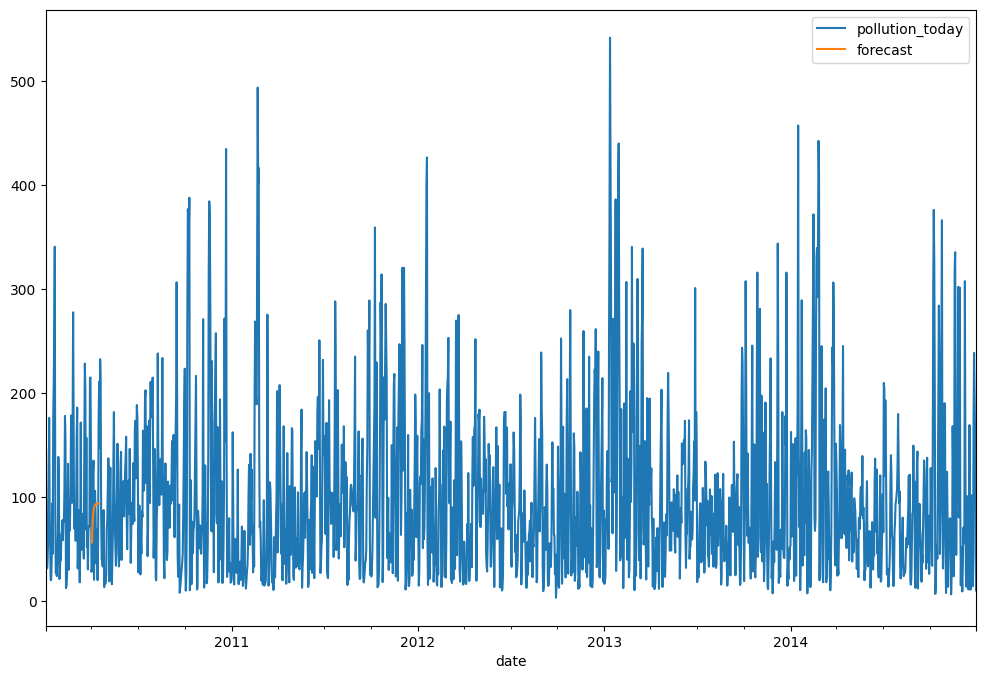

In [97]:
df['forecast']=model_fit.predict(start=90, end=103, dynamic=True)

df[['pollution_today','forecast']].plot(figsize=(12,8))

c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

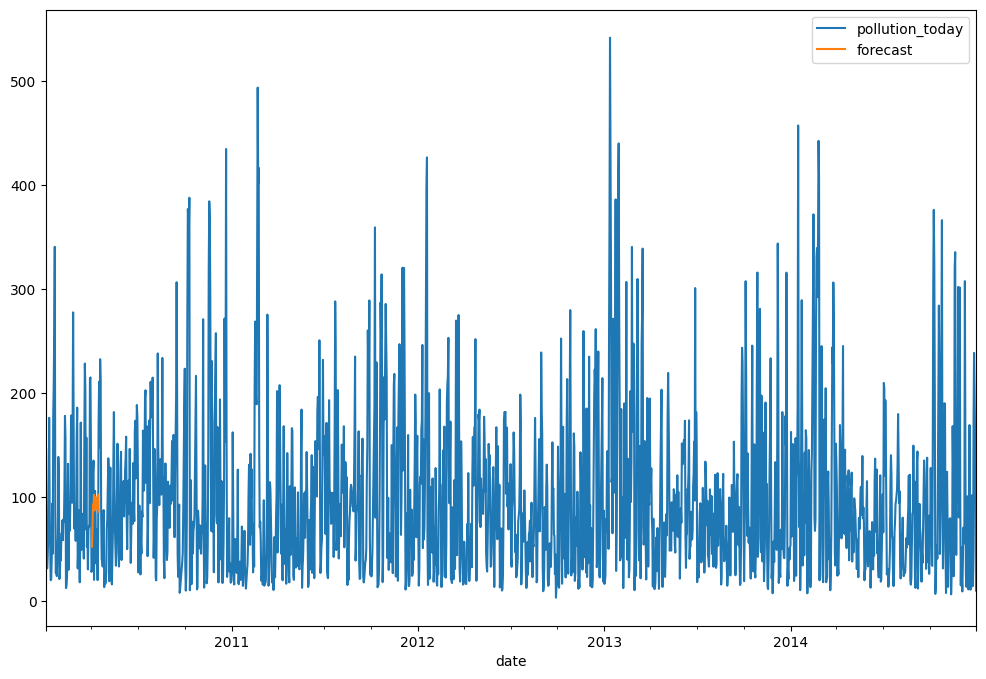

In [98]:
model=ARIMA(df['pollution_today'], order=(10,1,10))

model_fit=model.fit()
model_fit.summary()

df['forecast']=model_fit.predict(start=90, end=103, dynamic=True)

df[['pollution_today','forecast']].plot(figsize=(12,8))

# E- Auto ARIMA

In [99]:
import pmdarima as pm

In [100]:
autoModel = pm.auto_arima(df_training.pollution_today, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
autoModel.fit(df_training.pollution_today)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17080.930, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15381.900, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16102.127, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=15382.844, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=15382.054, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=15377.910, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=15221.955, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=15783.529, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=15167.481, Time=0.43 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=15632.148, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=15157.269, Time=0.80 sec
 ARIMA(0,0,4)(0,0,0)[0]             :

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [101]:
order = autoModel.order

yhat = list()


for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    
    model = ARIMA(temp_train.pollution_today, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end= len(temp_train), dynamic=False)
    
    yhat = yhat +[predictions]
    
yhat = pd.concat(yhat)

resultsDict['AutoARIMA{0}'. format(order)]= evaluate(df_test.pollution_today, yhat)
predictionsDict['AutoARIMA{0}'. format(order)]= yhat.values

  0%|          | 0/456 [00:00<?, ?it/s]c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
  0%|          | 1/456 [00:00<01:12,  6.29it/s]c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\s

In [102]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                 1824
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10123.283
Date:                Mon, 24 Jun 2024   AIC                          20254.565
Time:                        10:51:32   BIC                          20276.601
Sample:                    01-02-2010   HQIC                         20262.694
                         - 12-30-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.2934      3.842     25.582      0.000      90.763     105.824
ar.L1          0.3771      0.029     12.993      0.000       0.320       0.434
ma.L1          0.2918      0.033      8.811      0.000       0.227       0.357
sigma2      3881.6639     98.544     39.390      0.000    3688.521    4074.807
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               417.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.65
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

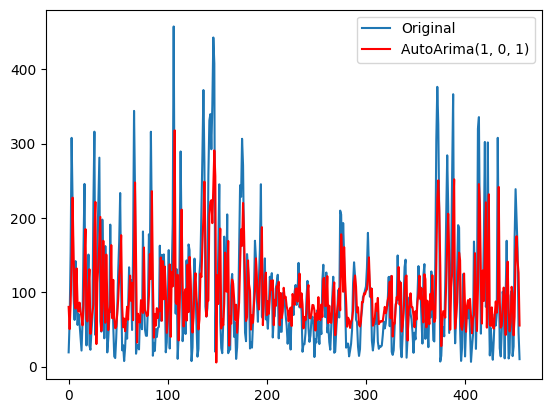

In [103]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='AutoArima{0}'.format(order))
plt.legend()


# SARIMA and SARIMAX


# F- Seasonal Autoregressive Integrated Moving-Average (SARIMA)


In [104]:
import statsmodels.api as sm

seasonal_order=(1,1,1,12)
12 - ci dice che la stagionalità mensile

In [105]:
df = df[:365].copy()

In [106]:
model = sm.tsa.statespace.SARIMAX(df['pollution_today'], order=(10,1,10), seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                        pollution_today   No. Observations:                  365
Model:             SARIMAX(10, 1, 10)x(1, 1, [1], 12)   Log Likelihood               -1969.570
Date:                                Mon, 24 Jun 2024   AIC                           3985.140
Time:                                        10:51:42   BIC                           4074.004
Sample:                                    01-02-2010   HQIC                          4020.504
                                         - 01-01-2011                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1694      0.695     -0.244      0.807      -1.531       1.192
ar.L2          0.1892      0.719      0.263      0.792      -1.220       1.598
ar.L3          0.2534      0.679      0.373      0.709      -1.077       1.583
ar.L4          0.4386      0.755      0.581      0.561      -1.042       1.919
ar.L5         -0.1110      0.602     -0.184      0.854      -1.291       1.069
ar.L6         -0.7029      0.345     -2.037      0.042      -1.379      -0.026
ar.L7          0.1880      0.736      0.256      0.798      -1.254       1.630
ar.L8         -0.2654      0.609     -0.436      0.663      -1.458       0.928
ar.L9         -0.0979      0.373     -0.263      0.793      -0.828       0.633
ar.L10         0.0990      0.305      0.325      0.745      -0.499       0.697
ma.L1         -0.1761      0.945     -0.186      0.852      -2.028       1.676
ma.L2         -0.6361      0.926     -0.687      0.492      -2.452       1.180
ma.L3         -0.3126      0.918     -0.341      0.733      -2.112       1.486
ma.L4         -0.5316      0.986     -0.539      0.590      -2.464       1.401
ma.L5          0.2679      0.867      0.309      0.757      -1.432       1.968
ma.L6          0.8682      0.706      1.230      0.219      -0.515       2.252
ma.L7         -0.3327      0.961     -0.346      0.729      -2.217       1.551
ma.L8          0.1924      0.750      0.257      0.797      -1.277       1.661
ma.L9          0.0519      0.599      0.087      0.931      -1.122       1.225
ma.L10        -0.3899      0.507     -0.769      0.442      -1.384       0.604
ar.S.L12      -0.1495      0.111     -1.344      0.179      -0.367       0.069
ma.S.L12      -0.9165      0.085    -10.732      0.000      -1.084      -0.749
sigma2      5028.8027   3244.842      1.550      0.121   -1330.971    1.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                24.09
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

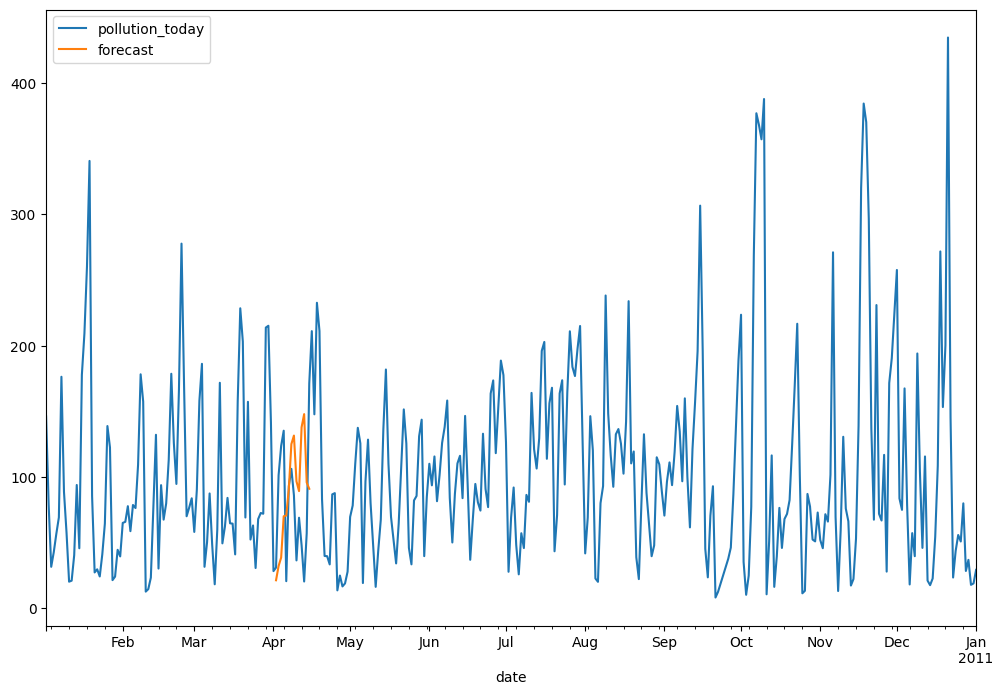

In [108]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['pollution_today','forecast']].plot(figsize=(12,8))

# FUTURE DF

In [109]:
from pandas.tseries.offsets import DateOffset

In [120]:
df.tail()

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference,forecast
date,,,,
2010-12-28,28.166667,-51.541667,-26.041667,NaN
2010-12-29,36.625000,8.458333,-71.708333,NaN
2010-12-30,17.583333,-19.041667,-254.166667,NaN
2010-12-31,18.666667,1.083333,-134.458333,NaN
2011-01-01,29.000000,10.333333,-171.291667,NaN


In [110]:
future_dates= [df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [111]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [121]:
future_datest_df.tail()

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference,forecast
2012-08-01,NaN,NaN,NaN,NaN
2012-09-01,NaN,NaN,NaN,NaN
2012-10-01,NaN,NaN,NaN,NaN
2012-11-01,NaN,NaN,NaN,NaN
2012-12-01,NaN,NaN,NaN,NaN


In [113]:
future_df= pd.concat([df,future_datest_df])

In [114]:
future_df

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference,forecast
2010-01-02,145.958333,NaN,NaN,NaN
2010-01-03,78.833333,-67.125000,NaN,NaN
2010-01-04,31.333333,-47.500000,NaN,NaN
2010-01-05,42.458333,11.125000,NaN,NaN
2010-01-06,56.416667,13.958333,NaN,NaN
...,...,...,...,...
2012-08-01,NaN,NaN,NaN,NaN
2012-09-01,NaN,NaN,NaN,NaN
2012-10-01,NaN,NaN,NaN,NaN
2012-11-01,NaN,NaN,NaN,NaN


<Axes: >

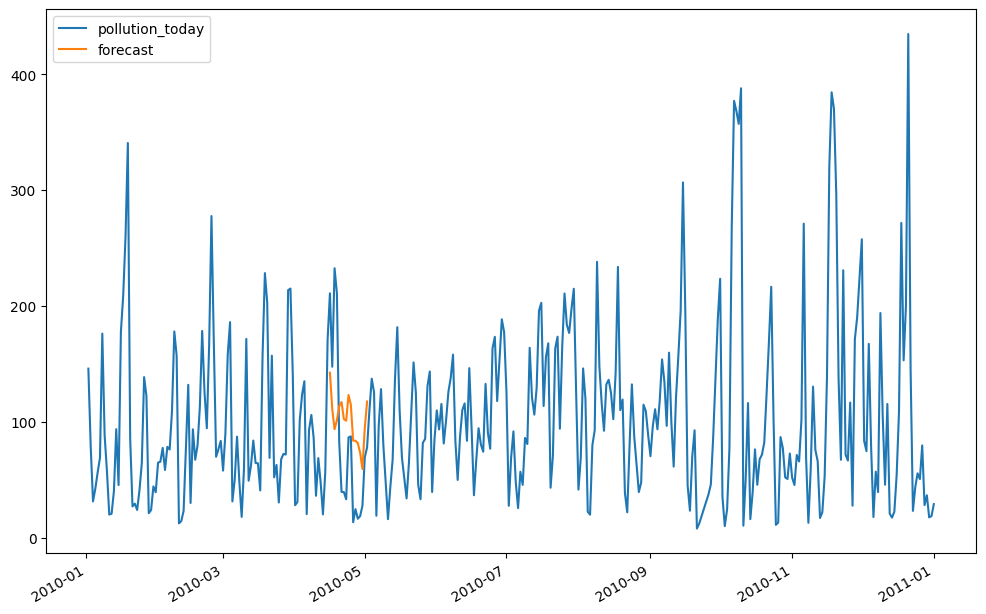

In [122]:
future_df['forecast']= results.predict(start=104, end=120, dynamic=True)
future_df[['pollution_today','forecast']].plot(figsize=(12,8))

# G -SARIMAX


# H- Auto SARIMA

In [116]:
autoModel = pm.auto_arima(df_training.pollution_today, trace=True, error_action='ignore',
                          suppress_warnings=True, seasonal=True, m=6, stepwise=True)
autoModel.fit(df_training.pollution_today)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=15151.494, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=15720.339, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=15170.169, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=15224.847, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=17080.930, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=15149.722, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=15148.112, Time=0.24 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=15149.742, Time=0.46 sec
 ARIMA(1,0,2)(0,0,0)[6] intercept   : AIC=15146.174, Time=0.57 sec
 ARIMA(1,0,2)(1,0,0)[6] intercept   : AIC=15147.782, Time=0.97 sec
 ARIMA(1,0,2)(0,0,1)[6] intercept   : AIC=15147.759, Time=0.98 sec
 ARIMA(1,0,2)(1,0,1)[6] intercept   : AIC=15149.598, Time=0.78 sec
 ARIMA(0,0,2)(0,0,0)[6] intercept   : AIC=15159.011, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[6] intercept   : AIC=15144.185, Time=0.31 sec
 ARIMA(1,0,1)(1,0,0

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 6),
      suppress_warnings=True)

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [118]:
order = autoModel.order
seasonalOrder = autoModel.seasonal_order

yhat = list()

for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    model = SARIMAX(temp_train.pollution_today, order=order,
                    seasonal_order=seasonalOrder)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoSARIMAX {0},{1}'.format(order, seasonalOrder)] = evaluate(
    df_test.pollution_today, yhat.values)
predictionsDict['AutoSARIMAX {0},{1}'.format(
    order, seasonalOrder)] = yhat.values

  0%|          | 0/456 [00:00<?, ?it/s]c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\giord\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarn

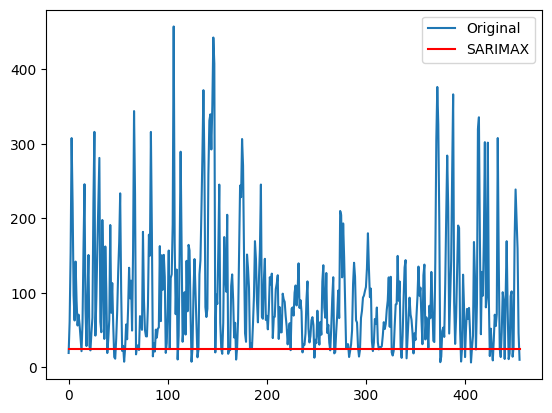

In [119]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()